In [6]:
import tensorflow as tf
from tensorflow import keras

In [8]:
mnist_dataset = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [10]:
len(x_train)

60000

In [11]:
x_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

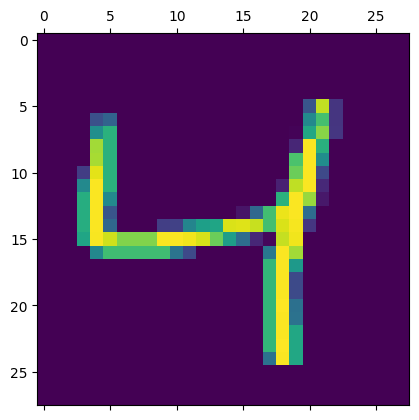

In [7]:
plt.matshow(x_train[2])

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = keras.Sequential([ # he model starts with a Flatten layer to prepare the input.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6641 - accuracy: 0.8317 - val_loss: 0.3689 - val_accuracy: 0.8972
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.9032 - val_loss: 0.3017 - val_accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9168 - val_loss: 0.2712 - val_accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9267 - val_loss: 0.2457 - val_accuracy: 0.9290
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2398 - accuracy: 0.9334 - val_loss: 0.2266 - val_accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2200 - accuracy: 0.9387 - val_loss: 0.2088 - val_accuracy: 0.9418
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2034 - accuracy: 0.9436 - val_loss: 0.1960 - val_accuracy:

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1638 - accuracy: 0.9531
Loss=0.164
Accuracy=0.953


In [15]:
import random

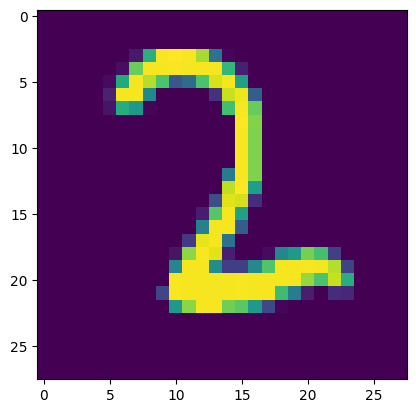

In [18]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [19]:
import numpy as np
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 2


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Training Accuracy

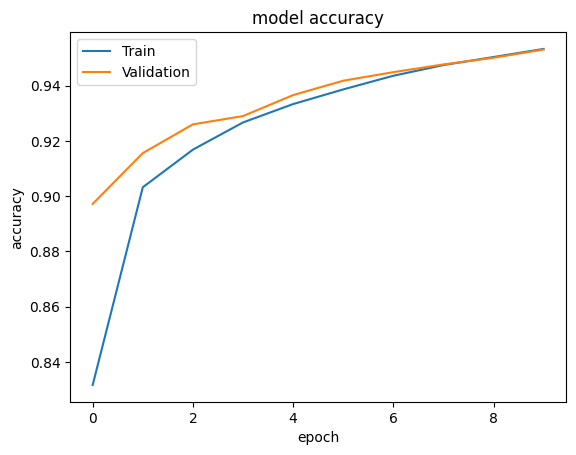

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

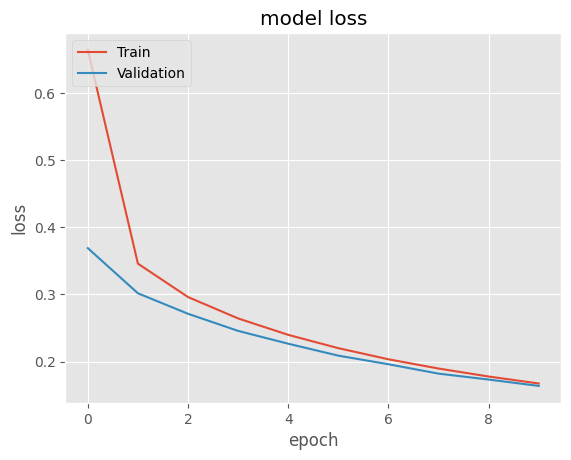

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()